# Install and Import

In [1]:
!pip install roboflow
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 9.4 MB/s eta 0:00:00


In [23]:
from collections import Counter
from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
from ultralytics.utils.plotting import Annotator
from shapely.geometry import Polygon
import cv2
import os
from shapely.geometry import box
from supervision.video.sink import VideoSink
from supervision.video.dataclasses import VideoInfo


In [20]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.16.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading the dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dfRaFkuXkdpBruC4B7FX")
project = rf.workspace("fum-wb2sc").project("comfort_ind")
dataset = project.version(6).download("yolov8")

# Loading Pre-trained YOLOv8m Model

In [5]:
model = YOLO("yolov8m.pt")


100%|██████████| 49.7M/49.7M [00:00<00:00, 198MB/s]


# Compute Number of cows in each region

In [6]:
def is_inside(x1, y1, x2, y2, polygon_vertices):
    # Create a polygon object using the coordinates of the polygon vertices
    polygon = Polygon(polygon_vertices)

    # Create a rectangle object using the coordinates of the rectangle
    rectangle = Polygon([(x1,y1), (x2,y1),(x2,y2), (x1,y2)])

    # Check if the rectangle is completely inside the polygon
    if polygon.contains(rectangle):
        return True

    # Calculate the area of the intersection between the rectangle and the polygon
    intersection_area = polygon.intersection(rectangle).area

    # Calculate the area of the rectangle
    rectangle_area = (x2 - x1) * (y2 - y1)

    # Calculate the percentage of the rectangle area that is inside the polygon
    percentage_inside = intersection_area / rectangle_area

    # Check if the percentage is greater than or equal to 0.7
    if percentage_inside >= 0.6:
        return True

    return False

In [7]:
# Defining labels of our regions
labels_list = {
    0.0: "Drinker",
    1.0:"Feeder",
    2.0: "Stall",
    3.0: "Walking",

}

# **Predict and showing the results**


image 1/6 /content/comfort_ind-6/train/images/Screenshot-2023-10-04-091026_png.rf.38c520c1d6149baedddf13877b5bb02c.jpg: 352x640 19 cows, 26.2ms
image 2/6 /content/comfort_ind-6/train/images/Screenshot-2023-10-04-092439_png.rf.94fe25621326b5b3609a5c3602a42f8b.jpg: 320x640 20 cows, 23.2ms
image 3/6 /content/comfort_ind-6/train/images/Screenshot-2023-10-04-092631_png.rf.8d3fdbd5c4cfd9ad60c3c242374cb011.jpg: 320x640 25 cows, 22.5ms
image 4/6 /content/comfort_ind-6/train/images/Screenshot-2023-10-04-092759_png.rf.c505d62dcfc69ad550e1cb64ee25b624.jpg: 288x640 20 cows, 22.8ms
image 5/6 /content/comfort_ind-6/train/images/Screenshot-2023-10-04-093212_png.rf.c9a4124dd6dedecd67347eccf74e7b6a.jpg: 320x640 1 person, 1 boat, 3 cows, 23.2ms
image 6/6 /content/comfort_ind-6/train/images/frame_confort_index_png.rf.c3cdb22a15db82b06ee57dfb55410ad0.jpg: 384x640 1 car, 9 cows, 26.6ms
Speed: 1.7ms preprocess, 24.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/de

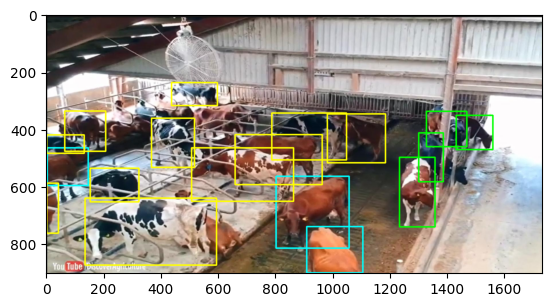

{'Walking': 3, 'Feeder': 4, 'Stall': 11}


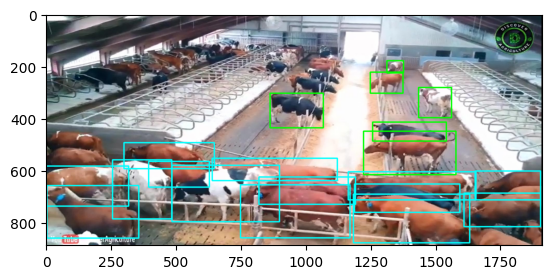

{'Walking': 14, 'Feeder': 6}


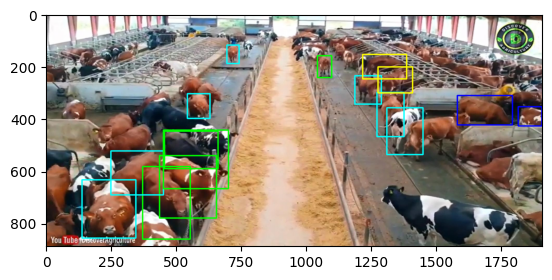

{'Walking': 7, 'Drinker': 2, 'Feeder': 5, 'Stall': 2}


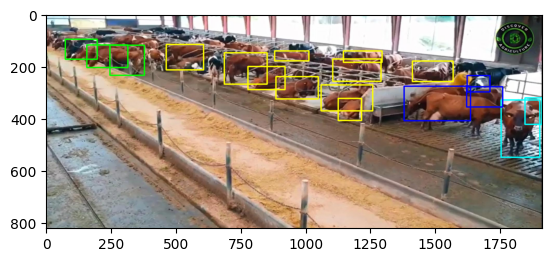

{'Walking': 2, 'Stall': 10, 'Drinker': 3, 'Feeder': 3}


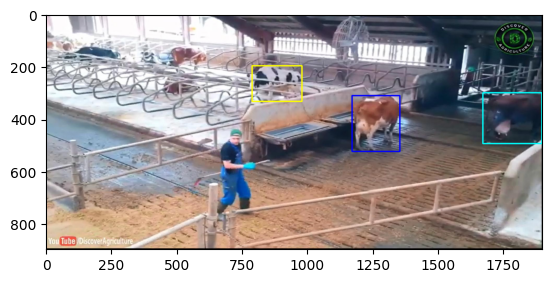

{'Drinker': 1, 'Walking': 1, 'Stall': 1}


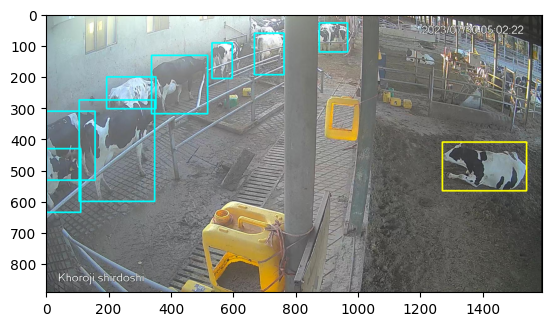

{'Stall': 1, 'Walking': 8}


In [15]:
# Counting cows in each regions
import glob
import os

results = model.predict('/content/comfort_ind-6/train/images/' , save = True , save_txt = True, iou = 0.55)
dir_path = '/content/comfort_ind-6/train/labels'
image_path = '/content/comfort_ind-6/train/images'
image_inputs = sorted(os.listdir(image_path))
colors = [(255, 0, 0), (0,255,0), (0, 255, 255), (255, 255, 0), (255, 0, 255)]

# Get a list of all the .txt files in the directory
txt_files = sorted(glob.glob(dir_path + '/*.txt'))

# Loop through each file and open it
for i in range(len(txt_files)):
    with open(txt_files[i], 'r') as file:
      region_lines = file.readlines()
    counter_list = []
    r = results[i]
    if image_inputs[i].endswith('.jpg') or image_inputs[i].endswith('.jpeg') or image_inputs[i].endswith('.png'):
      image = cv2.imread(os.path.join(image_path,image_inputs[i]))
      height , width, _ = image.shape
    annotator = Annotator(image)
    boxes = r.boxes
    for box in boxes:
      c = box.cls
      if c == 19:
        b_draw = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
        b = box.xyxyn[0]  # get box coordinates in (top, left, bottom, right) format
        x1, y1, x2, y2 = b.tolist()
        for line in region_lines:
          label, *points = map(float, line.split())
          polygon_points = [(points[i], points[i + 1]) for i in range(0, len(points), 2)]
          if is_inside(x1, y1, x2, y2, polygon_points):
            color_ind = label
            label = labels_list[label]
            counter_list.append(label)
            annotator.box_label(b_draw, color= colors[int(color_ind)])
    frame = annotator.result()
    cv2.imwrite(image_inputs[i],frame)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()

    print(dict(Counter(counter_list)))

Trcking

In [17]:
TARGET_VIDEO_PATH = "/content/drive/MyDrive/project/conf_index_output.mp4"
SOURCE_VIDEO_PATH = '/content/drive/MyDrive/project/video_test_confer_index.mp4'

In [24]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator


cap = cv2.VideoCapture('/content/drive/MyDrive/project/video_test_confer_index.mp4')
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255)]

dir_path = '/content/comfort_ind-6/train/labels/frame_confort_index_png.rf.c3cdb22a15db82b06ee57dfb55410ad0.txt'

# Create a list to store all the frames
frames = []
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
  while True:
      _, frame = cap.read()

      if frame is None:
          break  # No more frames to read, exit the loop
      results = model.predict(frame)

      with open(dir_path, 'r') as file:
          region_lines = file.readlines()

      r = results[0]
      annotator = Annotator(frame)
      boxes = r.boxes

      for box in boxes:
          c = box.cls
          if c == 19:
              b_draw = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
              b = box.xyxyn[0]  # get box coordinates in (top, left, bottom, right) format
              x1, y1, x2, y2 = b.tolist()
              idx = -1
              for line in region_lines:
                  idx += 1
                  label, *points = map(float, line.split())
                  polygon_points = [(points[i], points[i + 1]) for i in range(0, len(points), 2)]
                  if is_inside(x1, y1, x2, y2, polygon_points):
                      color = colors[int(label)]
                      label = labels_list[label]
                      annotator.box_label(b_draw, color=color)  # Assign a color based on the box index

      frame = annotator.result()
      sink.write_frame(frame)
  cap.release()


0: 384x640 1 traffic light, 4 cows, 1 snowboard, 26.1ms
Speed: 2.9ms preprocess, 26.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
12 labels saved to runs/detect/predict/labels

0: 384x640 1 traffic light, 4 cows, 1 snowboard, 30.2ms
Speed: 3.4ms preprocess, 30.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
12 labels saved to runs/detect/predict/labels

0: 384x640 1 traffic light, 4 cows, 1 snowboard, 26.1ms
Speed: 3.5ms preprocess, 26.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
12 labels saved to runs/detect/predict/labels

0: 384x640 1 traffic light, 3 cows, 1 snowboard, 26.0ms
Speed: 3.2ms preprocess, 26.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
12 labels saved to runs/detect/predict/labels

0: 384x640 1 traffic light, 4 cows, 1 snowboard, 26